<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DATA_MINING_ASSIGNMENT_3/blob/main/Crisp_DM/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/DATA_MINING_DATASETS/playlist_2010to2022.csv"
playlist_df = pd.read_csv(path)

In [3]:
# Checking for missing values in the dataset
missing_values = playlist_df.isnull().sum()

missing_values


playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         1
energy               1
key                  1
loudness             1
mode                 1
speechiness          1
acousticness         1
instrumentalness     1
liveness             1
valence              1
tempo                1
duration_ms          1
time_signature       1
dtype: int64

In [4]:
# Summary statistics for the numerical attributes
numerical_summary = playlist_df.describe()

numerical_summary


,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


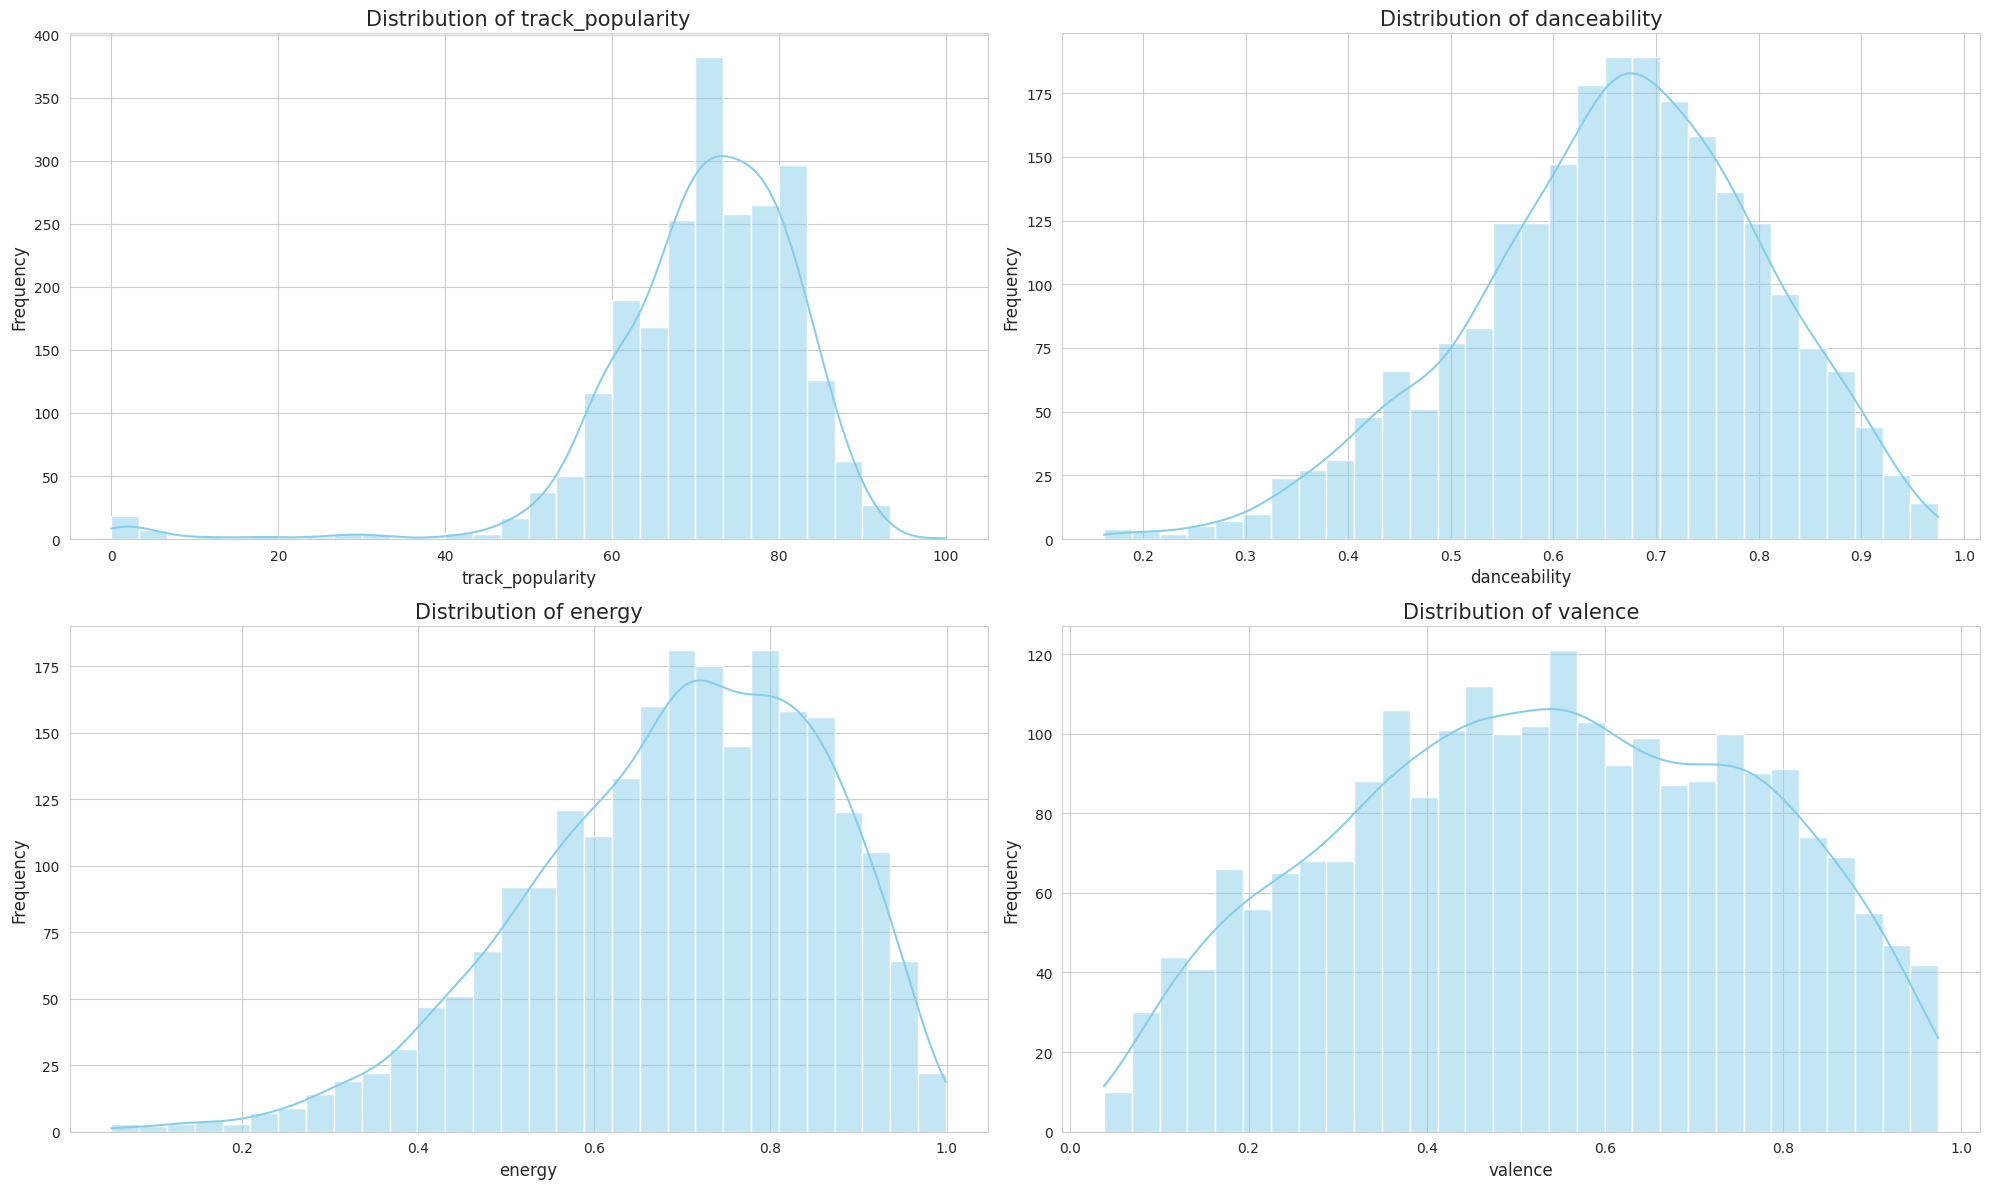

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visual style for the plots
sns.set_style("whitegrid")

# Initializing the figure
plt.figure(figsize=(20, 12))

# Creating subplots for each key variable
features = ['track_popularity', 'danceability', 'energy', 'valence']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(playlist_df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}', fontsize=15)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


In [6]:
# Imputing missing values with median
for column in playlist_df.columns:
    if playlist_df[column].isnull().sum() > 0:
        median_value = playlist_df[column].median()
        playlist_df[column].fillna(median_value, inplace=True)

# Verify if all missing values have been addressed
missing_after_imputation = playlist_df.isnull().sum()

missing_after_imputation


playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

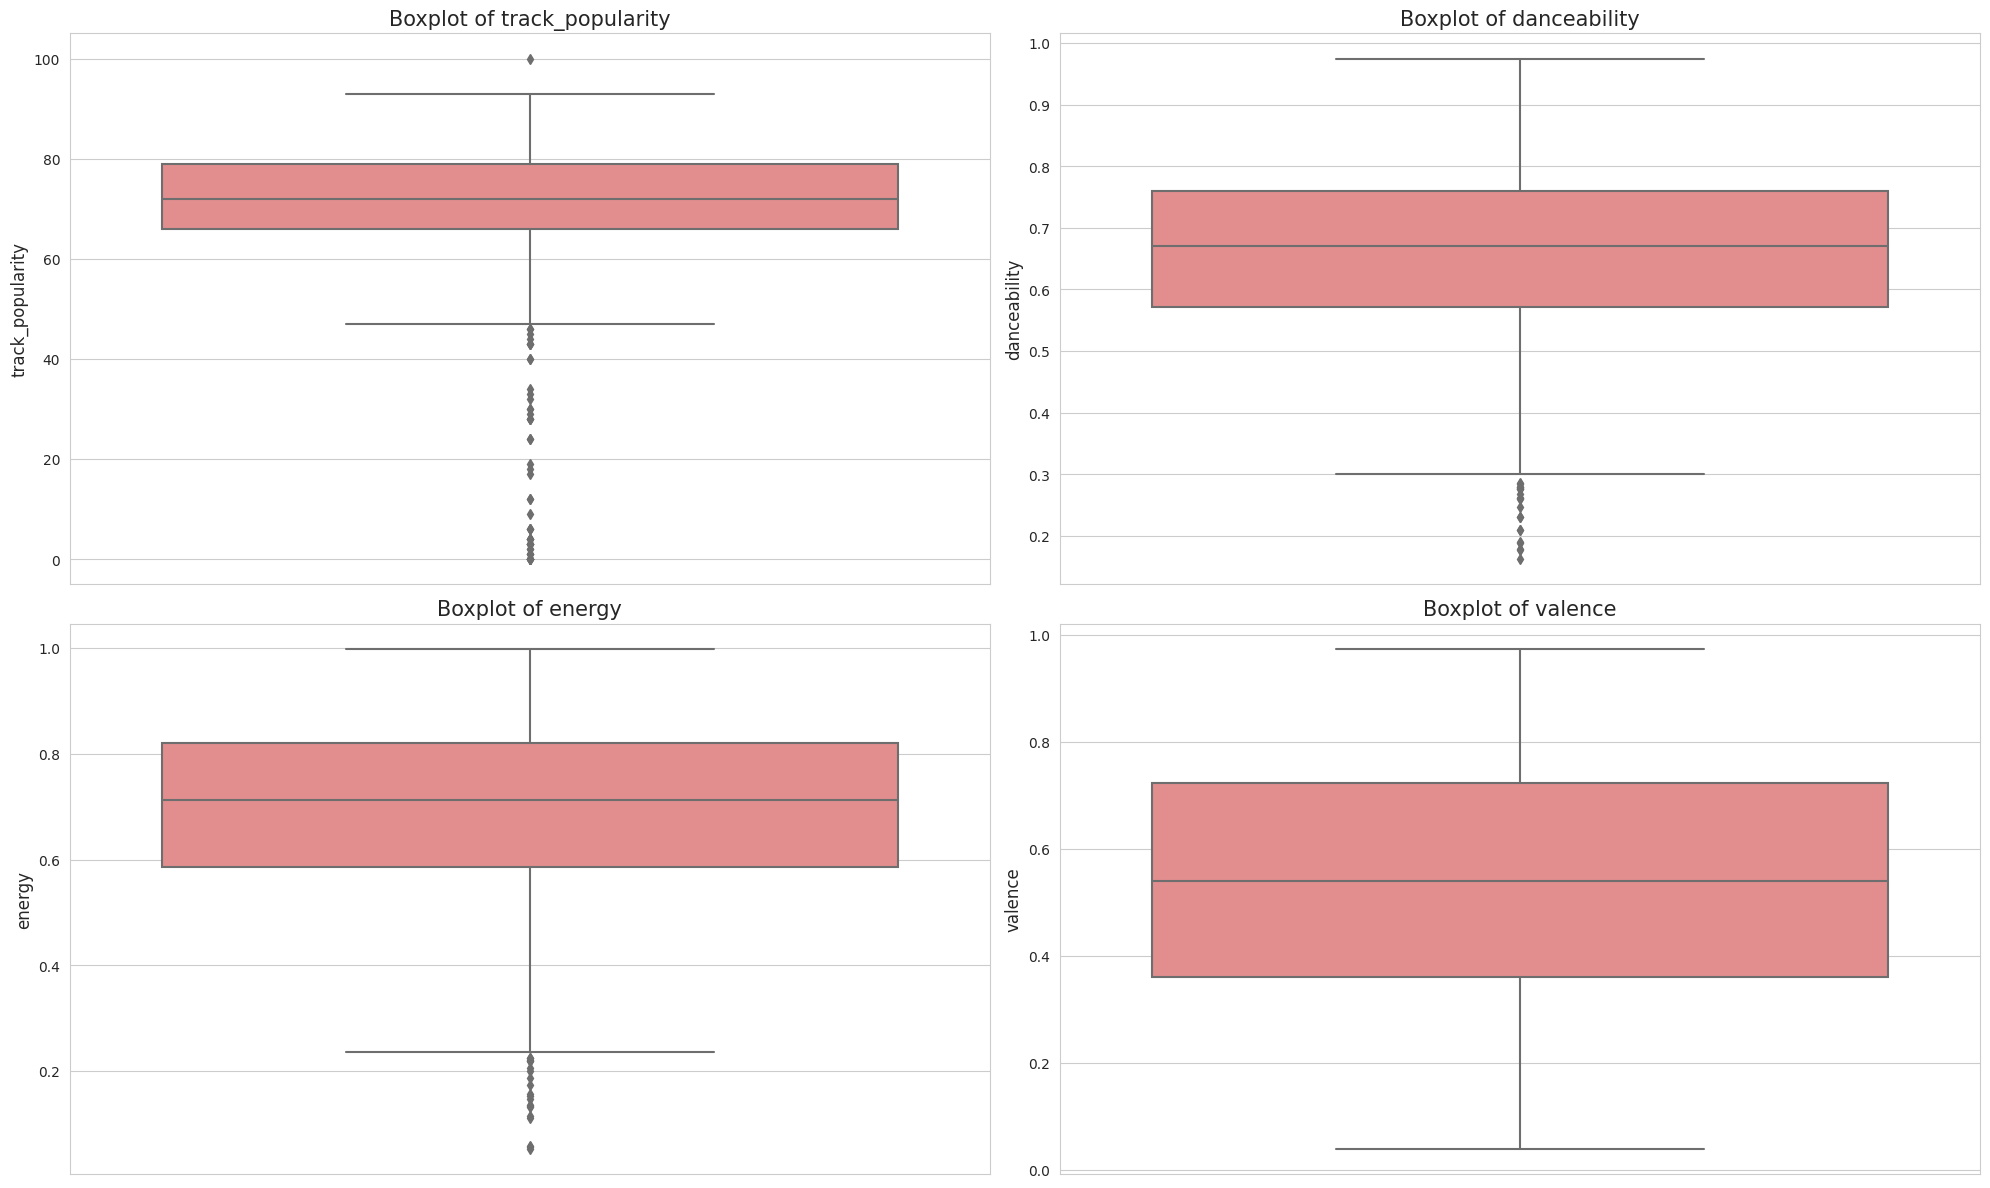

In [7]:
# Initializing the figure for boxplots
plt.figure(figsize=(20, 12))

# Creating boxplots for each key variable to visualize outliers
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=playlist_df[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}', fontsize=15)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()


In [8]:
# Extracting primary genre from the artist_genres column
playlist_df['primary_genre'] = playlist_df['artist_genres'].apply(lambda x: eval(x)[0] if eval(x) else 'Unknown')

# Display the first few rows to verify the new column
playlist_df[['artist_genres', 'primary_genre']].head()


,artist_genres,primary_genre
0,"['permanent wave', 'pop']",permanent wave
1,"['alternative metal', 'modern rock', 'pop punk...",alternative metal
2,"['contemporary country', 'country', 'country d...",contemporary country
3,"['alternative metal', 'nu metal', 'post-grunge...",alternative metal
4,"['boy band', 'dance pop', 'pop']",boy band


In [9]:
from sklearn.model_selection import train_test_split

# Selecting relevant features for modeling
X = playlist_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']]
y = playlist_df['track_popularity']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((1840, 11), (460, 11))

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing and training the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(201.84498941558053, 0.0024317743565041017)

In [11]:
# Extracting feature importances (coefficients) from the model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lr_model.coef_
}).sort_values(by='Importance', ascending=False)

feature_importances


,Feature,Importance
4,acousticness,1.974381
0,danceability,1.791808
2,loudness,0.398562
8,tempo,0.000941
9,duration_ms,-0.000015
10,time_signature,-1.274342
6,liveness,-1.357243
5,instrumentalness,-1.839223
7,valence,-2.678375
3,speechiness,-2.957875
